# Data analysis
In this iPython notebook, we analyse the data produced by the basic stock market model

In [18]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-darkgrid')

First, we open a connection to the database

In [2]:
conn = sqlite3.connect('dataBase.sqlite')
cur = conn.cursor()

## 1 Analysis of state variables 

We then reconnect the Statevariables table with the 'JOIN' 'ON' operation and store the results in a pandas dataframe. 

We use the following SQL syntax: 

"""
SELECT Statevariables.period, Variabletypes.variable_type, Objects.object_name, Objects.object_type ,Statevariables.value FROM Statevariables JOIN Variabletypes JOIN Objects ON Statevariables.variable_type = Variabletypes.id and Statevariables.owner_id = Objects.id
"""

### 1.1 Stocks 

In this section, we examine the state variables of stocks. These are: 
* the firm the stock links to,
* the face value,
* the amount of stocks outstanding. 

In this version of the model these variables are static and therefore not very interesting. 

In [9]:
stockVariables = pd.read_sql_query("SELECT Statevariables.period, Variabletypes.variable_type, Objects.object_name, Objects.object_type ,Statevariables.value FROM Statevariables JOIN Variabletypes JOIN Objects ON Statevariables.variable_type = Variabletypes.id and Statevariables.owner_id = Objects.id WHERE Objects.object_type = 'stock'", conn)

In [21]:
stockVariables.tail()

,period,variable_type,object_name,object_type,value
1595,99,firm,stock_2,stock,2
1596,99,name,stock_3,stock,3
1597,99,amount,stock_3,stock,200
1598,99,face_value,stock_3,stock,50
1599,99,firm,stock_3,stock,3


In [22]:
stock_0 = stockVariables.query('variable_type == "amount" and object_name == "stock_0"')['value']
stock_1 = stockVariables.query('variable_type == "amount" and object_name == "stock_1"')['value']
stock_2 = stockVariables.query('variable_type == "amount" and object_name == "stock_2"')['value']
stock_3 = stockVariables.query('variable_type == "amount" and object_name == "stock_3"')['value']
time = stockVariables.query('variable_type == "amount" and object_name == "stock_3"')['period']

In [30]:
face_value_0 = stockVariables.query('variable_type == "face_value" and object_name == "stock_0"')['value']
face_value_1 = stockVariables.query('variable_type == "face_value" and object_name == "stock_1"')['value']
face_value_2 = stockVariables.query('variable_type == "face_value" and object_name == "stock_2"')['value']
face_value_3 = stockVariables.query('variable_type == "face_value" and object_name == "stock_3"')['value']

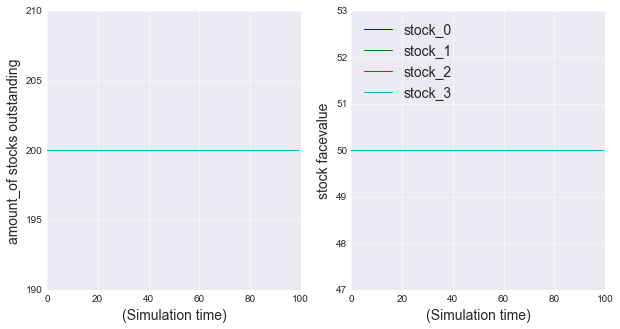

In [32]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, stock_0, label='stock_0')
ax1.plot(time, stock_1, label='stock_1')
ax1.plot(time, stock_2, label='stock_2')
ax1.plot(time, stock_3, label='stock_3')

ax2.plot(time, face_value_0, label='stock_0')
ax2.plot(time, face_value_1, label='stock_1')
ax2.plot(time, face_value_2, label='stock_2')
ax2.plot(time, face_value_3, label='stock_3')

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax2.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('amount_of stocks outstanding', fontsize='14')
ax2.set_ylabel('stock facevalue', fontsize='14')

plt.legend(loc=2, fontsize='14')

### 1.2 Firms 

In this section, we examine the state variables of firms. These are: 
* profit
* Bookvalue,
* Dividend rate.

In [11]:
firmVariables = pd.read_sql_query("SELECT Statevariables.period, Variabletypes.variable_type, Objects.object_name, Objects.object_type, Statevariables.value FROM Statevariables JOIN Variabletypes JOIN Objects ON Statevariables.variable_type = Variabletypes.id and Statevariables.owner_id = Objects.id WHERE Objects.object_type = 'firm'", conn)

In [37]:
firmVariables.head(15)

,period,variable_type,object_name,object_type,value
0,0,name,firm_0,firm,0
1,0,profit_growth_history,firm_0,firm,"[0.1333333333333333, 0.11764705882352944, 0.05..."
2,0,profit_history,firm_0,firm,"[150, 170, 190, 200, 202]"
3,0,book_value,firm_0,firm,10000
4,0,dividend_rate,firm_0,firm,1
5,0,profit,firm_0,firm,202
6,0,name,firm_1,firm,1
7,0,profit_growth_history,firm_1,firm,"[0.1333333333333333, 0.11764705882352944, 0.05..."
8,0,profit_history,firm_1,firm,"[150, 170, 190, 200, 210]"
9,0,book_value,firm_1,firm,10000


In [47]:
firm_0 = firmVariables.query('variable_type == "profit" and object_name == "firm_0"')['value']
firm_1 = firmVariables.query('variable_type == "profit" and object_name == "firm_1"')['value']
firm_2 = firmVariables.query('variable_type == "profit" and object_name == "firm_2"')['value']
firm_3 = firmVariables.query('variable_type == "profit" and object_name == "firm_3"')['value']
f_time = firmVariables.query('variable_type == "profit" and object_name == "firm_3"')['period']

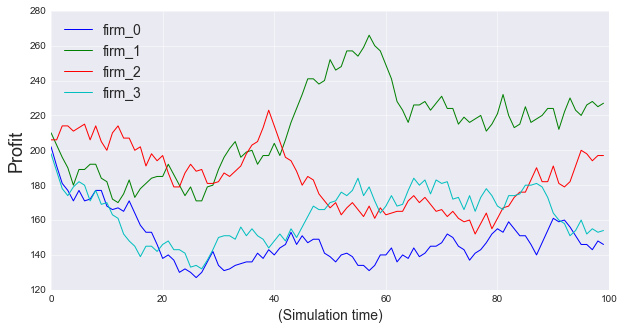

In [49]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

ax1.plot(f_time, firm_0, label='firm_0')
ax1.plot(f_time, firm_1, label='firm_1')
ax1.plot(f_time, firm_2, label='firm_2')
ax1.plot(f_time, firm_3, label='firm_3')

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('Profit', fontsize='18')

plt.legend(loc=2, fontsize='14')

### 1.3 Traders

In this section, we examine the state variables of traders. These are: 
* Money
* Portfolio of stocks: *The type and amount of that stock agent holds*
* Bid-ask spread: *the percentage difference between the amount at which an agent is willing to buy and sell a stock.*
* Memory size: *the amount of periods an agent remembers stock prices*

In [12]:
traderVariables = pd.read_sql_query("SELECT Statevariables.period, Variabletypes.variable_type, Objects.object_name, Objects.object_type, Statevariables.value FROM Statevariables JOIN Variabletypes JOIN Objects ON Statevariables.variable_type = Variabletypes.id and Statevariables.owner_id = Objects.id WHERE Objects.object_type = 'trader'", conn)

In [59]:
traderVariables.tail()

,period,variable_type,object_name,object_type,value
99995,99,name,trader_76,trader,76
99996,99,money,trader_76,trader,196.384
99997,99,memory_size,trader_76,trader,3
99998,99,bid_ask_spread,trader_76,trader,5
99999,99,stocks,trader_76,trader,"{stock_2: 1, stock_0: 0, stock_3: 1, stock_1: 0}"


In [55]:
trader_0 = traderVariables.query('variable_type == "money" and object_name == "trader_0"')['value']
t_time = traderVariables.query('variable_type == "money" and object_name == "trader_0"')['period']

Over time some traders trade more than other and thus their **money** either increases or decreases. All traders start out with money between 200 and 250 and over time this branches out to a distribution between 0 and 280. 

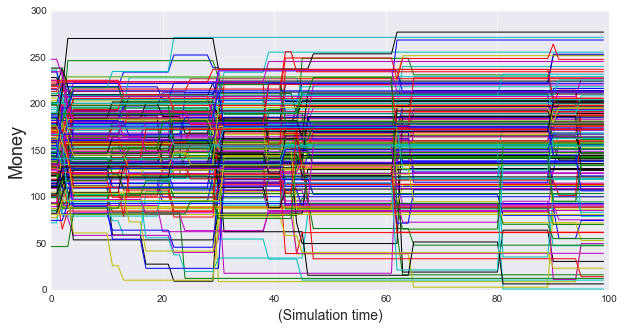

In [58]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

for trader in traderVariables['object_name'].unique():
    ax1.plot(t_time, 
            traderVariables.query('variable_type == "money" and object_name == "{}"'.format(trader))['value'],
            label=trader)

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('Money', fontsize='18')

#plt.legend(loc=2, fontsize='14')

Likewise the distribution of stocks changes. 
{stock_2: 1, stock_0: 0, stock_3: 1, stock_1: 0}

In [64]:
# TODO find a way to turn the string representation of the stocks dictionary into a python dictionary.
# 1 add ' ' to keys in string repr of dictionary
# 2 apply the ast. iterval 
dictio = {'stock_2': 1, 'stock_0': 1, 'stock_3': 1, 'stock_1': 1}
sum(dictio.values())

4

In [74]:
# step 2
import ast
ast.literal_eval("{'stock_2': 1, 'stock_0': 1, 'stock_3': 1, 'stock_1': 1}")

"{'stock_1': 1, 'stock_3': 1, 'stock_0': 1, 'stock_2': 1}"

In [61]:
traderVariables.query('variable_type == "stocks" and object_name == "trader_0"')['value']

534      {stock_2: 1, stock_0: 1, stock_3: 1, stock_1: 1}
1739     {stock_2: 1, stock_0: 1, stock_3: 1, stock_1: 1}
2399     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
3909     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
4784     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
5014     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
6189     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
7624     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
8209     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
9714     {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
10129    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
11214    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
12314    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
13054    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
14234    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
15784    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
16729    {stock_2: 1, stock_0: 1, stock_3: 0, stock_1: 1}
17454    {stoc

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(111)

ax1.plot(t_time, )

# for trader in traderVariables['object_name'].unique():
#     ax1.plot(t_time, 
#             traderVariables.query('variable_type == "money" and object_name == "{}"'.format(trader))['value'],
#             label=trader)

ax1.set_xlabel('(Simulation time)', fontsize='14')
ax1.set_ylabel('Money', fontsize='18')

#plt.legend(loc=2, fontsize='14')

## Analysis of transactions

We then reconnect the SQL tables via the 'JOIN' 'ON' operation. 

(e.g. SELECT Album.title, Artist.name FROM Album JOIN Artist ON Album.artist_id = Artist_id)
(or SELECT Transactions.period, Transactions.amount_of_product, Transactions.amount_of_money, Objects.object_name, Objects.object_type JOIN ON Transactions.buyer_id = Objects.id)

In [ ]:
cur.close()
conn.close()